In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = np.genfromtxt('./data/kmeans.txt', delimiter='')

In [43]:
def euclDistance(vector1,vector2):
    return np.sqrt(sum((vector2-vector1)**2))
def initCentroids(data,k):
    numSamples,dim = data.shape
    centroids = np.zeros((k,dim))
    for i in range(k):
        index = int(np.random.uniform(0,numSamples))
        centroids[i,:]=data[index,:]
    return centroids
def kmeans(data,k):
    numSamples = data.shape[0]
    clusterData = np.array(np.zeros((numSamples,2)))
    clusterChanged = True
    centroids = initCentroids(data,k)
    while clusterChanged:  
        clusterChanged = False  
        # 循环每一个样本 
        for i in range(numSamples):  
            # 最小距离
            minDist  = 100000.0  
            # 定义样本所属的簇
            minIndex = 0  
            # 循环计算每一个质心与该样本的距离
            for j in range(k):  
                # 循环每一个质心和样本，计算距离
                distance = euclDistance(centroids[j, :], data[i, :])  
                # 如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist:  
                    minDist  = distance  
                    # 更新样本所属的簇
                    minIndex = j  
                    # 更新最小距离
                    clusterData[i, 1] = distance
              
            # 如果样本的所属的簇发生了变化
            if clusterData[i, 0] != minIndex:  
                # 质心要重新计算
                clusterChanged = True
                # 更新样本的簇
                clusterData[i, 0] = minIndex
        # 更新质心
        for j in range(k):  
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]  
            # 计算质心
            centroids[j, :] = np.mean(pointsInCluster, axis = 0) 
#         showCluster(data, k, centroids, clusterData)
  
    return centroids, clusterData  


# 显示结果 
def showCluster(data, k, centroids, clusterData):  
    numSamples, dim = data.shape  
    if dim != 2:  
        print("dimension of your data is not 2!")  
        return 1  
  
    # 用不同颜色形状来表示各个类别
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("Your k is too large!")  
        return 1  
  
    # 画样本点  
    for i in range(numSamples):  
        markIndex = int(clusterData[i, 0])  
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])  
  
    # 用不同颜色形状来表示各个类别
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # 画质心点 
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
  
    plt.show()
                  

In [44]:
list_lost=[]
for k in range(2,10):
    min_loss = 10000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])
    for i in range(50):
        centroids,clusterData = kmeans(data,k)
        loss = sum(clusterData[:,1])/data.shape[0]
        if loss<min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_lost.append(min_loss)

C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\anaconda\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [45]:
list_lost

[2.9811811738953176,
 1.9708559728104191,
 1.1675654672086735,
 1.0712368269135584,
 1.0033240887599812,
 0.9531752184757147,
 0.8809719541010846,
 0.8339213660300222]

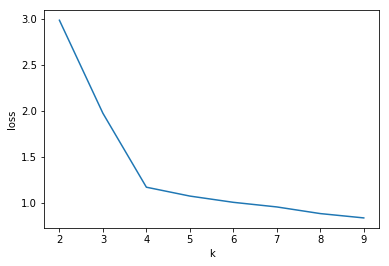

In [46]:
plt.plot(range(2,10),list_lost)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [47]:
x_test = [0,1]

In [48]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1))-centroids)**2).sum(axis=1)) for data in datas])

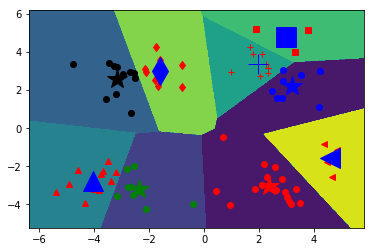

In [49]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
showCluster(data, k, centroids, clusterData)  